In [1]:
# Gym stuff
import gym
import gym_anytrading

/home/troysattgast/miniconda3/envs/gym-env/lib/python3.7/site-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


In [2]:
# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/home/troysattgast/miniconda3/envs/gym-env/lib/python3.7/site-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [3]:
# Processing libraries
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import yfinance as yf

from indicators import get_indicators

In [12]:
df = get_indicators('IWM', sd=dt.datetime(2018, 1, 1), ed=dt.datetime(2021, 12, 22),
                    missing_day = None)
df.dropna(axis=0, inplace=True)
df.rename(columns={'Price':'Close'}, inplace=True)
df.head()

,Close,Volume,sma,bb_pct,momentum,cci,so,macd
Date,,,,,,,,
2018-01-31,148.904297,27468900,149.600459,0.594268,101.598417,-7.594174,38.983019,0.476517
2018-02-01,149.370956,21413000,149.733308,0.552704,101.811005,-30.552681,43.351710,0.427269
2018-02-02,146.494965,33314100,149.702835,0.952469,99.585691,-115.425686,0.000000,0.333233
2018-02-05,140.866776,52622200,149.375716,1.312110,95.561749,-240.926943,0.000000,0.138061
2018-02-06,142.552353,69232400,149.121447,1.044869,96.555506,-250.783479,14.700810,-0.086058


In [17]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [19]:
env.action_space

Discrete(2)

info {'total_reward': 13.175979614257812, 'total_profit': 0.8048576463142532, 'position': 1}


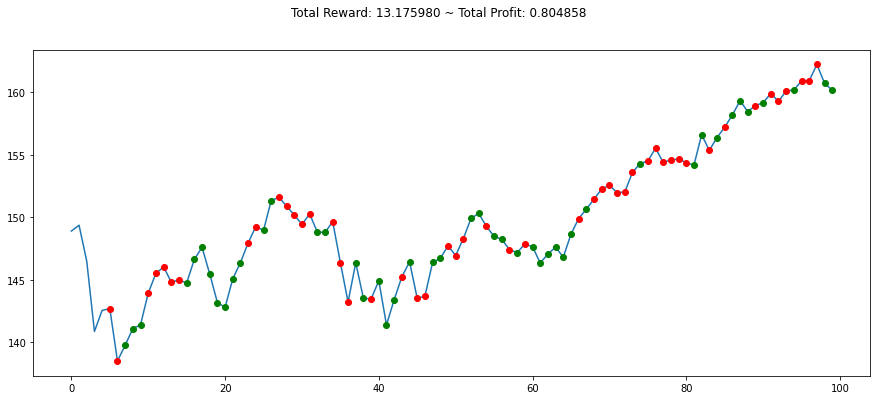

In [20]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [21]:

env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

### Train

In [22]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.55     |
| fps                | 29       |
| nupdates           | 1        |
| policy_entropy     | 0.691    |
| total_timesteps    | 5        |
| value_loss         | 28.7     |
---------------------------------
---------------------------------
| explained_variance | 0.00436  |
| fps                | 815      |
| nupdates           | 100      |
| policy_entropy     | 0.689    |
| total_timesteps    | 500      |
| value_loss         | 1.31     |
---------------------------------
---------------------------------
| explained_variance | 0.00157  |
| fps                | 956     

---------------------------------
| explained_variance | -0.172   |
| fps                | 1107     |
| nupdates           | 1500     |
| policy_entropy     | 0.691    |
| total_timesteps    | 7500     |
| value_loss         | 0.00458  |
---------------------------------
---------------------------------
| explained_variance | -0.259   |
| fps                | 1109     |
| nupdates           | 1600     |
| policy_entropy     | 0.58     |
| total_timesteps    | 8000     |
| value_loss         | 0.0595   |
---------------------------------
---------------------------------
| explained_variance | 0.00798  |
| fps                | 1111     |
| nupdates           | 1700     |
| policy_entropy     | 0.687    |
| total_timesteps    | 8500     |
| value_loss         | 6.08     |
---------------------------------
---------------------------------
| explained_variance | 0.0158   |
| fps                | 1115     |
| nupdates           | 1800     |
| policy_entropy     | 0.656    |
| total_timest

---------------------------------
| explained_variance | 0.0108   |
| fps                | 1129     |
| nupdates           | 4600     |
| policy_entropy     | 0.685    |
| total_timesteps    | 23000    |
| value_loss         | 0.834    |
---------------------------------
---------------------------------
| explained_variance | -0.00834 |
| fps                | 1128     |
| nupdates           | 4700     |
| policy_entropy     | 0.681    |
| total_timesteps    | 23500    |
| value_loss         | 28.8     |
---------------------------------
---------------------------------
| explained_variance | -0.00652 |
| fps                | 1129     |
| nupdates           | 4800     |
| policy_entropy     | 0.674    |
| total_timesteps    | 24000    |
| value_loss         | 1.68     |
---------------------------------
---------------------------------
| explained_variance | 0.0154   |
| fps                | 1130     |
| nupdates           | 4900     |
| policy_entropy     | 0.686    |
| total_timest

---------------------------------
| explained_variance | -0.00319 |
| fps                | 1129     |
| nupdates           | 7700     |
| policy_entropy     | 0.644    |
| total_timesteps    | 38500    |
| value_loss         | 1.84     |
---------------------------------
---------------------------------
| explained_variance | 0.00529  |
| fps                | 1129     |
| nupdates           | 7800     |
| policy_entropy     | 0.666    |
| total_timesteps    | 39000    |
| value_loss         | 1.73     |
---------------------------------
---------------------------------
| explained_variance | -0.00808 |
| fps                | 1129     |
| nupdates           | 7900     |
| policy_entropy     | 0.692    |
| total_timesteps    | 39500    |
| value_loss         | 0.534    |
---------------------------------
---------------------------------
| explained_variance | -0.00149 |
| fps                | 1129     |
| nupdates           | 8000     |
| policy_entropy     | 0.641    |
| total_timest

---------------------------------
| explained_variance | -0.0115  |
| fps                | 1134     |
| nupdates           | 10800    |
| policy_entropy     | 0.604    |
| total_timesteps    | 54000    |
| value_loss         | 0.019    |
---------------------------------
---------------------------------
| explained_variance | 0.0652   |
| fps                | 1135     |
| nupdates           | 10900    |
| policy_entropy     | 0.692    |
| total_timesteps    | 54500    |
| value_loss         | 0.0086   |
---------------------------------
---------------------------------
| explained_variance | -1.34    |
| fps                | 1135     |
| nupdates           | 11000    |
| policy_entropy     | 0.685    |
| total_timesteps    | 55000    |
| value_loss         | 0.0844   |
---------------------------------
---------------------------------
| explained_variance | 0.000696 |
| fps                | 1136     |
| nupdates           | 11100    |
| policy_entropy     | 0.687    |
| total_timest

---------------------------------
| explained_variance | 0.00363  |
| fps                | 1139     |
| nupdates           | 13900    |
| policy_entropy     | 0.69     |
| total_timesteps    | 69500    |
| value_loss         | 2.36     |
---------------------------------
---------------------------------
| explained_variance | 0.00292  |
| fps                | 1139     |
| nupdates           | 14000    |
| policy_entropy     | 0.692    |
| total_timesteps    | 70000    |
| value_loss         | 2.81     |
---------------------------------
---------------------------------
| explained_variance | 0.149    |
| fps                | 1139     |
| nupdates           | 14100    |
| policy_entropy     | 0.691    |
| total_timesteps    | 70500    |
| value_loss         | 8.02     |
---------------------------------
---------------------------------
| explained_variance | -0.00553 |
| fps                | 1139     |
| nupdates           | 14200    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | 0.0271   |
| fps                | 1146     |
| nupdates           | 17000    |
| policy_entropy     | 0.671    |
| total_timesteps    | 85000    |
| value_loss         | 0.138    |
---------------------------------
---------------------------------
| explained_variance | 0.00939  |
| fps                | 1146     |
| nupdates           | 17100    |
| policy_entropy     | 0.69     |
| total_timesteps    | 85500    |
| value_loss         | 0.164    |
---------------------------------
---------------------------------
| explained_variance | 0.254    |
| fps                | 1147     |
| nupdates           | 17200    |
| policy_entropy     | 0.682    |
| total_timesteps    | 86000    |
| value_loss         | 0.0204   |
---------------------------------
---------------------------------
| explained_variance | 0.0191   |
| fps                | 1147     |
| nupdates           | 17300    |
| policy_entropy     | 0.681    |
| total_timest

---------------------------------
| explained_variance | 0.044    |
| fps                | 1149     |
| nupdates           | 20100    |
| policy_entropy     | 0.685    |
| total_timesteps    | 100500   |
| value_loss         | 0.966    |
---------------------------------
---------------------------------
| explained_variance | 0.0496   |
| fps                | 1149     |
| nupdates           | 20200    |
| policy_entropy     | 0.684    |
| total_timesteps    | 101000   |
| value_loss         | 0.0216   |
---------------------------------
---------------------------------
| explained_variance | -0.0589  |
| fps                | 1150     |
| nupdates           | 20300    |
| policy_entropy     | 0.674    |
| total_timesteps    | 101500   |
| value_loss         | 0.00808  |
---------------------------------
---------------------------------
| explained_variance | -17.3    |
| fps                | 1150     |
| nupdates           | 20400    |
| policy_entropy     | 0.692    |
| total_timest

---------------------------------
| explained_variance | 0.45     |
| fps                | 1153     |
| nupdates           | 23200    |
| policy_entropy     | 0.655    |
| total_timesteps    | 116000   |
| value_loss         | 4.55     |
---------------------------------
---------------------------------
| explained_variance | 0.01     |
| fps                | 1153     |
| nupdates           | 23300    |
| policy_entropy     | 0.692    |
| total_timesteps    | 116500   |
| value_loss         | 5.04     |
---------------------------------
---------------------------------
| explained_variance | 0.197    |
| fps                | 1153     |
| nupdates           | 23400    |
| policy_entropy     | 0.692    |
| total_timesteps    | 117000   |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | -0.0102  |
| fps                | 1154     |
| nupdates           | 23500    |
| policy_entropy     | 0.683    |
| total_timest

---------------------------------
| explained_variance | -0.00552 |
| fps                | 1157     |
| nupdates           | 26300    |
| policy_entropy     | 0.674    |
| total_timesteps    | 131500   |
| value_loss         | 0.0335   |
---------------------------------
---------------------------------
| explained_variance | -0.186   |
| fps                | 1157     |
| nupdates           | 26400    |
| policy_entropy     | 0.673    |
| total_timesteps    | 132000   |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.00826  |
| fps                | 1157     |
| nupdates           | 26500    |
| policy_entropy     | 0.692    |
| total_timesteps    | 132500   |
| value_loss         | 0.873    |
---------------------------------
---------------------------------
| explained_variance | 0.0835   |
| fps                | 1158     |
| nupdates           | 26600    |
| policy_entropy     | 0.687    |
| total_timest

---------------------------------
| explained_variance | -0.0238  |
| fps                | 1160     |
| nupdates           | 29400    |
| policy_entropy     | 0.587    |
| total_timesteps    | 147000   |
| value_loss         | 0.016    |
---------------------------------
---------------------------------
| explained_variance | -0.282   |
| fps                | 1161     |
| nupdates           | 29500    |
| policy_entropy     | 0.69     |
| total_timesteps    | 147500   |
| value_loss         | 0.0295   |
---------------------------------
---------------------------------
| explained_variance | 0.00209  |
| fps                | 1161     |
| nupdates           | 29600    |
| policy_entropy     | 0.69     |
| total_timesteps    | 148000   |
| value_loss         | 4.51     |
---------------------------------
---------------------------------
| explained_variance | 0.0017   |
| fps                | 1161     |
| nupdates           | 29700    |
| policy_entropy     | 0.691    |
| total_timest

---------------------------------
| explained_variance | 0.0758   |
| fps                | 1162     |
| nupdates           | 32500    |
| policy_entropy     | 0.64     |
| total_timesteps    | 162500   |
| value_loss         | 0.0075   |
---------------------------------
---------------------------------
| explained_variance | 0.876    |
| fps                | 1162     |
| nupdates           | 32600    |
| policy_entropy     | 0.643    |
| total_timesteps    | 163000   |
| value_loss         | 1.21     |
---------------------------------
---------------------------------
| explained_variance | -0.00253 |
| fps                | 1162     |
| nupdates           | 32700    |
| policy_entropy     | 0.661    |
| total_timesteps    | 163500   |
| value_loss         | 18.1     |
---------------------------------
---------------------------------
| explained_variance | 0.0065   |
| fps                | 1162     |
| nupdates           | 32800    |
| policy_entropy     | 0.69     |
| total_timest

---------------------------------
| explained_variance | 0.044    |
| fps                | 1164     |
| nupdates           | 35600    |
| policy_entropy     | 0.672    |
| total_timesteps    | 178000   |
| value_loss         | 0.0499   |
---------------------------------
---------------------------------
| explained_variance | 0.00922  |
| fps                | 1164     |
| nupdates           | 35700    |
| policy_entropy     | 0.688    |
| total_timesteps    | 178500   |
| value_loss         | 1.14     |
---------------------------------
---------------------------------
| explained_variance | 0.0027   |
| fps                | 1164     |
| nupdates           | 35800    |
| policy_entropy     | 0.691    |
| total_timesteps    | 179000   |
| value_loss         | 2.54     |
---------------------------------
---------------------------------
| explained_variance | -0.0149  |
| fps                | 1164     |
| nupdates           | 35900    |
| policy_entropy     | 0.689    |
| total_timest

---------------------------------
| explained_variance | 0.00536  |
| fps                | 1165     |
| nupdates           | 38700    |
| policy_entropy     | 0.674    |
| total_timesteps    | 193500   |
| value_loss         | 0.138    |
---------------------------------
----------------------------------
| explained_variance | -7.33e-05 |
| fps                | 1165      |
| nupdates           | 38800     |
| policy_entropy     | 0.677     |
| total_timesteps    | 194000    |
| value_loss         | 4.29      |
----------------------------------
---------------------------------
| explained_variance | -11.1    |
| fps                | 1165     |
| nupdates           | 38900    |
| policy_entropy     | 0.68     |
| total_timesteps    | 194500   |
| value_loss         | 0.178    |
---------------------------------
---------------------------------
| explained_variance | 0.0129   |
| fps                | 1166     |
| nupdates           | 39000    |
| policy_entropy     | 0.648    |
| tota

---------------------------------
| explained_variance | 0.00328  |
| fps                | 1167     |
| nupdates           | 41800    |
| policy_entropy     | 0.688    |
| total_timesteps    | 209000   |
| value_loss         | 0.661    |
---------------------------------
---------------------------------
| explained_variance | -0.012   |
| fps                | 1167     |
| nupdates           | 41900    |
| policy_entropy     | 0.67     |
| total_timesteps    | 209500   |
| value_loss         | 0.0952   |
---------------------------------
---------------------------------
| explained_variance | 0.662    |
| fps                | 1167     |
| nupdates           | 42000    |
| policy_entropy     | 0.529    |
| total_timesteps    | 210000   |
| value_loss         | 2.52     |
---------------------------------
---------------------------------
| explained_variance | 0.000168 |
| fps                | 1167     |
| nupdates           | 42100    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | -0.0111  |
| fps                | 1168     |
| nupdates           | 44800    |
| policy_entropy     | 0.66     |
| total_timesteps    | 224000   |
| value_loss         | 0.0291   |
---------------------------------
---------------------------------
| explained_variance | 0.00228  |
| fps                | 1168     |
| nupdates           | 44900    |
| policy_entropy     | 0.691    |
| total_timesteps    | 224500   |
| value_loss         | 0.4      |
---------------------------------
---------------------------------
| explained_variance | -0.00305 |
| fps                | 1168     |
| nupdates           | 45000    |
| policy_entropy     | 0.689    |
| total_timesteps    | 225000   |
| value_loss         | 0.592    |
---------------------------------
---------------------------------
| explained_variance | -0.00354 |
| fps                | 1168     |
| nupdates           | 45100    |
| policy_entropy     | 0.68     |
| total_timest

---------------------------------
| explained_variance | -0.0339  |
| fps                | 1169     |
| nupdates           | 47900    |
| policy_entropy     | 0.682    |
| total_timesteps    | 239500   |
| value_loss         | 0.0155   |
---------------------------------
---------------------------------
| explained_variance | -0.116   |
| fps                | 1169     |
| nupdates           | 48000    |
| policy_entropy     | 0.631    |
| total_timesteps    | 240000   |
| value_loss         | 0.016    |
---------------------------------
---------------------------------
| explained_variance | -0.0127  |
| fps                | 1169     |
| nupdates           | 48100    |
| policy_entropy     | 0.689    |
| total_timesteps    | 240500   |
| value_loss         | 0.0162   |
---------------------------------
----------------------------------
| explained_variance | -0.000552 |
| fps                | 1169      |
| nupdates           | 48200     |
| policy_entropy     | 0.679     |
| total_t

---------------------------------
| explained_variance | 0.000813 |
| fps                | 1170     |
| nupdates           | 50900    |
| policy_entropy     | 0.636    |
| total_timesteps    | 254500   |
| value_loss         | 3.29     |
---------------------------------
---------------------------------
| explained_variance | -0.0205  |
| fps                | 1170     |
| nupdates           | 51000    |
| policy_entropy     | 0.684    |
| total_timesteps    | 255000   |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.609    |
| fps                | 1170     |
| nupdates           | 51100    |
| policy_entropy     | 0.692    |
| total_timesteps    | 255500   |
| value_loss         | 0.441    |
---------------------------------
----------------------------------
| explained_variance | -0.000729 |
| fps                | 1170      |
| nupdates           | 51200     |
| policy_entropy     | 0.691     |
| total_t

---------------------------------
| explained_variance | 0.00315  |
| fps                | 1171     |
| nupdates           | 54000    |
| policy_entropy     | 0.645    |
| total_timesteps    | 270000   |
| value_loss         | 0.187    |
---------------------------------
---------------------------------
| explained_variance | -0.0157  |
| fps                | 1171     |
| nupdates           | 54100    |
| policy_entropy     | 0.588    |
| total_timesteps    | 270500   |
| value_loss         | 0.0302   |
---------------------------------
---------------------------------
| explained_variance | -0.00082 |
| fps                | 1171     |
| nupdates           | 54200    |
| policy_entropy     | 0.684    |
| total_timesteps    | 271000   |
| value_loss         | 1.45     |
---------------------------------
----------------------------------
| explained_variance | -0.000948 |
| fps                | 1171      |
| nupdates           | 54300     |
| policy_entropy     | 0.693     |
| total_t

---------------------------------
| explained_variance | 0.00455  |
| fps                | 1172     |
| nupdates           | 57100    |
| policy_entropy     | 0.68     |
| total_timesteps    | 285500   |
| value_loss         | 0.773    |
---------------------------------
---------------------------------
| explained_variance | 0.00173  |
| fps                | 1172     |
| nupdates           | 57200    |
| policy_entropy     | 0.688    |
| total_timesteps    | 286000   |
| value_loss         | 0.437    |
---------------------------------
---------------------------------
| explained_variance | 0.00569  |
| fps                | 1172     |
| nupdates           | 57300    |
| policy_entropy     | 0.684    |
| total_timesteps    | 286500   |
| value_loss         | 0.0171   |
---------------------------------
---------------------------------
| explained_variance | -0.124   |
| fps                | 1172     |
| nupdates           | 57400    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | 0.00819  |
| fps                | 1172     |
| nupdates           | 60100    |
| policy_entropy     | 0.686    |
| total_timesteps    | 300500   |
| value_loss         | 0.0796   |
---------------------------------
---------------------------------
| explained_variance | -2.98    |
| fps                | 1172     |
| nupdates           | 60200    |
| policy_entropy     | 0.688    |
| total_timesteps    | 301000   |
| value_loss         | 0.0936   |
---------------------------------
---------------------------------
| explained_variance | -0.00398 |
| fps                | 1172     |
| nupdates           | 60300    |
| policy_entropy     | 0.684    |
| total_timesteps    | 301500   |
| value_loss         | 0.00602  |
---------------------------------
---------------------------------
| explained_variance | 0.00308  |
| fps                | 1172     |
| nupdates           | 60400    |
| policy_entropy     | 0.678    |
| total_timest

---------------------------------
| explained_variance | -0.00119 |
| fps                | 1172     |
| nupdates           | 63200    |
| policy_entropy     | 0.69     |
| total_timesteps    | 316000   |
| value_loss         | 0.358    |
---------------------------------
---------------------------------
| explained_variance | 0.593    |
| fps                | 1172     |
| nupdates           | 63300    |
| policy_entropy     | 0.602    |
| total_timesteps    | 316500   |
| value_loss         | 14       |
---------------------------------
---------------------------------
| explained_variance | -0.141   |
| fps                | 1172     |
| nupdates           | 63400    |
| policy_entropy     | 0.688    |
| total_timesteps    | 317000   |
| value_loss         | 4.66     |
---------------------------------
---------------------------------
| explained_variance | 0.00111  |
| fps                | 1172     |
| nupdates           | 63500    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | 0.00385  |
| fps                | 1173     |
| nupdates           | 66300    |
| policy_entropy     | 0.683    |
| total_timesteps    | 331500   |
| value_loss         | 0.22     |
---------------------------------
---------------------------------
| explained_variance | 0.00455  |
| fps                | 1173     |
| nupdates           | 66400    |
| policy_entropy     | 0.676    |
| total_timesteps    | 332000   |
| value_loss         | 0.4      |
---------------------------------
---------------------------------
| explained_variance | 0.00721  |
| fps                | 1173     |
| nupdates           | 66500    |
| policy_entropy     | 0.678    |
| total_timesteps    | 332500   |
| value_loss         | 0.52     |
---------------------------------
----------------------------------
| explained_variance | -0.000473 |
| fps                | 1173      |
| nupdates           | 66600     |
| policy_entropy     | 0.691     |
| total_t

---------------------------------
| explained_variance | 0.000294 |
| fps                | 1173     |
| nupdates           | 69400    |
| policy_entropy     | 0.69     |
| total_timesteps    | 347000   |
| value_loss         | 0.0166   |
---------------------------------
---------------------------------
| explained_variance | -0.0151  |
| fps                | 1173     |
| nupdates           | 69500    |
| policy_entropy     | 0.67     |
| total_timesteps    | 347500   |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | -0.0229  |
| fps                | 1173     |
| nupdates           | 69600    |
| policy_entropy     | 0.65     |
| total_timesteps    | 348000   |
| value_loss         | 1.39     |
---------------------------------
---------------------------------
| explained_variance | -0.0273  |
| fps                | 1173     |
| nupdates           | 69700    |
| policy_entropy     | 0.678    |
| total_timest

----------------------------------
| explained_variance | -0.000269 |
| fps                | 1173      |
| nupdates           | 72500     |
| policy_entropy     | 0.666     |
| total_timesteps    | 362500    |
| value_loss         | 23.6      |
----------------------------------
---------------------------------
| explained_variance | 0.000141 |
| fps                | 1173     |
| nupdates           | 72600    |
| policy_entropy     | 0.693    |
| total_timesteps    | 363000   |
| value_loss         | 4.78     |
---------------------------------
---------------------------------
| explained_variance | 0.849    |
| fps                | 1174     |
| nupdates           | 72700    |
| policy_entropy     | 0.605    |
| total_timesteps    | 363500   |
| value_loss         | 5.33     |
---------------------------------
---------------------------------
| explained_variance | -0.0265  |
| fps                | 1174     |
| nupdates           | 72800    |
| policy_entropy     | 0.604    |
| tota

---------------------------------
| explained_variance | 0.000115 |
| fps                | 1174     |
| nupdates           | 75500    |
| policy_entropy     | 0.656    |
| total_timesteps    | 377500   |
| value_loss         | 0.445    |
---------------------------------
---------------------------------
| explained_variance | 0.000587 |
| fps                | 1174     |
| nupdates           | 75600    |
| policy_entropy     | 0.692    |
| total_timesteps    | 378000   |
| value_loss         | 2.29     |
---------------------------------
---------------------------------
| explained_variance | -0.00271 |
| fps                | 1174     |
| nupdates           | 75700    |
| policy_entropy     | 0.693    |
| total_timesteps    | 378500   |
| value_loss         | 0.0842   |
---------------------------------
----------------------------------
| explained_variance | -0.000273 |
| fps                | 1174      |
| nupdates           | 75800     |
| policy_entropy     | 0.689     |
| total_t

---------------------------------
| explained_variance | -0.00148 |
| fps                | 1174     |
| nupdates           | 78500    |
| policy_entropy     | 0.692    |
| total_timesteps    | 392500   |
| value_loss         | 0.0533   |
---------------------------------
---------------------------------
| explained_variance | -0.00272 |
| fps                | 1174     |
| nupdates           | 78600    |
| policy_entropy     | 0.692    |
| total_timesteps    | 393000   |
| value_loss         | 0.245    |
---------------------------------
---------------------------------
| explained_variance | -0.0576  |
| fps                | 1174     |
| nupdates           | 78700    |
| policy_entropy     | 0.69     |
| total_timesteps    | 393500   |
| value_loss         | 0.188    |
---------------------------------
----------------------------------
| explained_variance | -0.000147 |
| fps                | 1174      |
| nupdates           | 78800     |
| policy_entropy     | 0.692     |
| total_t

---------------------------------
| explained_variance | -5.12    |
| fps                | 1174     |
| nupdates           | 81500    |
| policy_entropy     | 0.622    |
| total_timesteps    | 407500   |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.00541  |
| fps                | 1174     |
| nupdates           | 81600    |
| policy_entropy     | 0.692    |
| total_timesteps    | 408000   |
| value_loss         | 0.00344  |
---------------------------------
----------------------------------
| explained_variance | -0.000133 |
| fps                | 1174      |
| nupdates           | 81700     |
| policy_entropy     | 0.669     |
| total_timesteps    | 408500    |
| value_loss         | 3.72      |
----------------------------------
---------------------------------
| explained_variance | 0.578    |
| fps                | 1174     |
| nupdates           | 81800    |
| policy_entropy     | 0.689    |
| tota

---------------------------------
| explained_variance | -0.0119  |
| fps                | 1174     |
| nupdates           | 84500    |
| policy_entropy     | 0.664    |
| total_timesteps    | 422500   |
| value_loss         | 0.00622  |
---------------------------------
----------------------------------
| explained_variance | -0.000101 |
| fps                | 1174      |
| nupdates           | 84600     |
| policy_entropy     | 0.693     |
| total_timesteps    | 423000    |
| value_loss         | 5.04      |
----------------------------------
---------------------------------
| explained_variance | 2.99e-05 |
| fps                | 1174     |
| nupdates           | 84700    |
| policy_entropy     | 0.692    |
| total_timesteps    | 423500   |
| value_loss         | 1.51     |
---------------------------------
---------------------------------
| explained_variance | -0.00059 |
| fps                | 1174     |
| nupdates           | 84800    |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | 0.000443 |
| fps                | 1174     |
| nupdates           | 87600    |
| policy_entropy     | 0.691    |
| total_timesteps    | 438000   |
| value_loss         | 0.292    |
---------------------------------
----------------------------------
| explained_variance | -0.000425 |
| fps                | 1174      |
| nupdates           | 87700     |
| policy_entropy     | 0.674     |
| total_timesteps    | 438500    |
| value_loss         | 0.201     |
----------------------------------
---------------------------------
| explained_variance | 0.00247  |
| fps                | 1174     |
| nupdates           | 87800    |
| policy_entropy     | 0.693    |
| total_timesteps    | 439000   |
| value_loss         | 0.524    |
---------------------------------
---------------------------------
| explained_variance | 0.000189 |
| fps                | 1174     |
| nupdates           | 87900    |
| policy_entropy     | 0.685    |
| tota

---------------------------------
| explained_variance | -3.43    |
| fps                | 1174     |
| nupdates           | 90600    |
| policy_entropy     | 0.654    |
| total_timesteps    | 453000   |
| value_loss         | 0.0398   |
---------------------------------
----------------------------------
| explained_variance | -0.000121 |
| fps                | 1174      |
| nupdates           | 90700     |
| policy_entropy     | 0.69      |
| total_timesteps    | 453500    |
| value_loss         | 3.83      |
----------------------------------
---------------------------------
| explained_variance | 0.000486 |
| fps                | 1174     |
| nupdates           | 90800    |
| policy_entropy     | 0.692    |
| total_timesteps    | 454000   |
| value_loss         | 0.241    |
---------------------------------
---------------------------------
| explained_variance | 0.212    |
| fps                | 1174     |
| nupdates           | 90900    |
| policy_entropy     | 0.69     |
| tota

---------------------------------
| explained_variance | 0.000603 |
| fps                | 1175     |
| nupdates           | 93600    |
| policy_entropy     | 0.689    |
| total_timesteps    | 468000   |
| value_loss         | 0.127    |
---------------------------------
---------------------------------
| explained_variance | 0.6      |
| fps                | 1175     |
| nupdates           | 93700    |
| policy_entropy     | 0.602    |
| total_timesteps    | 468500   |
| value_loss         | 4.59     |
---------------------------------
---------------------------------
| explained_variance | 2.45e-05 |
| fps                | 1175     |
| nupdates           | 93800    |
| policy_entropy     | 0.688    |
| total_timesteps    | 469000   |
| value_loss         | 4.44     |
---------------------------------
---------------------------------
| explained_variance | 0.000173 |
| fps                | 1175     |
| nupdates           | 93900    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | 0.024    |
| fps                | 1175     |
| nupdates           | 96600    |
| policy_entropy     | 0.647    |
| total_timesteps    | 483000   |
| value_loss         | 0.0026   |
---------------------------------
---------------------------------
| explained_variance | 0.00121  |
| fps                | 1175     |
| nupdates           | 96700    |
| policy_entropy     | 0.65     |
| total_timesteps    | 483500   |
| value_loss         | 0.509    |
---------------------------------
---------------------------------
| explained_variance | -0.00116 |
| fps                | 1175     |
| nupdates           | 96800    |
| policy_entropy     | 0.686    |
| total_timesteps    | 484000   |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| explained_variance | 0.000151 |
| fps                | 1175     |
| nupdates           | 96900    |
| policy_entropy     | 0.658    |
| total_timest

----------------------------------
| explained_variance | -7.43e-05 |
| fps                | 1174      |
| nupdates           | 99600     |
| policy_entropy     | 0.693     |
| total_timesteps    | 498000    |
| value_loss         | 0.485     |
----------------------------------
---------------------------------
| explained_variance | 0.0016   |
| fps                | 1174     |
| nupdates           | 99700    |
| policy_entropy     | 0.688    |
| total_timesteps    | 498500   |
| value_loss         | 2.71     |
---------------------------------
---------------------------------
| explained_variance | -0.00132 |
| fps                | 1174     |
| nupdates           | 99800    |
| policy_entropy     | 0.585    |
| total_timesteps    | 499000   |
| value_loss         | 0.154    |
---------------------------------
---------------------------------
| explained_variance | 0.00119  |
| fps                | 1174     |
| nupdates           | 99900    |
| policy_entropy     | 0.662    |
| tota

---------------------------------
| explained_variance | 0.000292 |
| fps                | 1173     |
| nupdates           | 102600   |
| policy_entropy     | 0.673    |
| total_timesteps    | 513000   |
| value_loss         | 0.584    |
---------------------------------
---------------------------------
| explained_variance | -0.00218 |
| fps                | 1173     |
| nupdates           | 102700   |
| policy_entropy     | 0.683    |
| total_timesteps    | 513500   |
| value_loss         | 1.48     |
---------------------------------
---------------------------------
| explained_variance | -49.4    |
| fps                | 1173     |
| nupdates           | 102800   |
| policy_entropy     | 0.675    |
| total_timesteps    | 514000   |
| value_loss         | 6.77     |
---------------------------------
---------------------------------
| explained_variance | 0.000116 |
| fps                | 1173     |
| nupdates           | 102900   |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | 0.776    |
| fps                | 1172     |
| nupdates           | 105600   |
| policy_entropy     | 0.576    |
| total_timesteps    | 528000   |
| value_loss         | 7.09     |
---------------------------------
---------------------------------
| explained_variance | -0.00508 |
| fps                | 1172     |
| nupdates           | 105700   |
| policy_entropy     | 0.681    |
| total_timesteps    | 528500   |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.00021  |
| fps                | 1172     |
| nupdates           | 105800   |
| policy_entropy     | 0.691    |
| total_timesteps    | 529000   |
| value_loss         | 1.32     |
---------------------------------
---------------------------------
| explained_variance | 0.00968  |
| fps                | 1172     |
| nupdates           | 105900   |
| policy_entropy     | 0.617    |
| total_timest

----------------------------------
| explained_variance | -0.000848 |
| fps                | 1172      |
| nupdates           | 108600    |
| policy_entropy     | 0.666     |
| total_timesteps    | 543000    |
| value_loss         | 0.304     |
----------------------------------
---------------------------------
| explained_variance | -0.00027 |
| fps                | 1172     |
| nupdates           | 108700   |
| policy_entropy     | 0.689    |
| total_timesteps    | 543500   |
| value_loss         | 0.811    |
---------------------------------
---------------------------------
| explained_variance | -0.0058  |
| fps                | 1172     |
| nupdates           | 108800   |
| policy_entropy     | 0.658    |
| total_timesteps    | 544000   |
| value_loss         | 0.00615  |
---------------------------------
---------------------------------
| explained_variance | 0.000534 |
| fps                | 1172     |
| nupdates           | 108900   |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | -0.00192 |
| fps                | 1172     |
| nupdates           | 111600   |
| policy_entropy     | 0.688    |
| total_timesteps    | 558000   |
| value_loss         | 18.9     |
---------------------------------
---------------------------------
| explained_variance | 9.84e-05 |
| fps                | 1172     |
| nupdates           | 111700   |
| policy_entropy     | 0.693    |
| total_timesteps    | 558500   |
| value_loss         | 0.812    |
---------------------------------
---------------------------------
| explained_variance | -0.00156 |
| fps                | 1172     |
| nupdates           | 111800   |
| policy_entropy     | 0.656    |
| total_timesteps    | 559000   |
| value_loss         | 0.00427  |
---------------------------------
---------------------------------
| explained_variance | -0.12    |
| fps                | 1172     |
| nupdates           | 111900   |
| policy_entropy     | 0.691    |
| total_timest

---------------------------------
| explained_variance | 1.76e-05 |
| fps                | 1171     |
| nupdates           | 114600   |
| policy_entropy     | 0.682    |
| total_timesteps    | 573000   |
| value_loss         | 3.75     |
---------------------------------
---------------------------------
| explained_variance | 0.386    |
| fps                | 1172     |
| nupdates           | 114700   |
| policy_entropy     | 0.665    |
| total_timesteps    | 573500   |
| value_loss         | 9.15     |
---------------------------------
----------------------------------
| explained_variance | -5.66e-05 |
| fps                | 1172      |
| nupdates           | 114800    |
| policy_entropy     | 0.688     |
| total_timesteps    | 574000    |
| value_loss         | 1.7       |
----------------------------------
----------------------------------
| explained_variance | -0.000413 |
| fps                | 1172      |
| nupdates           | 114900    |
| policy_entropy     | 0.679     |
|

---------------------------------
| explained_variance | 0.000206 |
| fps                | 1171     |
| nupdates           | 117600   |
| policy_entropy     | 0.685    |
| total_timesteps    | 588000   |
| value_loss         | 0.453    |
---------------------------------
---------------------------------
| explained_variance | 0.000284 |
| fps                | 1171     |
| nupdates           | 117700   |
| policy_entropy     | 0.685    |
| total_timesteps    | 588500   |
| value_loss         | 0.134    |
---------------------------------
---------------------------------
| explained_variance | 9.34e-05 |
| fps                | 1171     |
| nupdates           | 117800   |
| policy_entropy     | 0.689    |
| total_timesteps    | 589000   |
| value_loss         | 0.469    |
---------------------------------
---------------------------------
| explained_variance | -0.00128 |
| fps                | 1171     |
| nupdates           | 117900   |
| policy_entropy     | 0.657    |
| total_timest

----------------------------------
| explained_variance | -3.48e-05 |
| fps                | 1172      |
| nupdates           | 120600    |
| policy_entropy     | 0.686     |
| total_timesteps    | 603000    |
| value_loss         | 1.37      |
----------------------------------
---------------------------------
| explained_variance | 0.00165  |
| fps                | 1172     |
| nupdates           | 120700   |
| policy_entropy     | 0.689    |
| total_timesteps    | 603500   |
| value_loss         | 0.511    |
---------------------------------
----------------------------------
| explained_variance | -3.99e-05 |
| fps                | 1172      |
| nupdates           | 120800    |
| policy_entropy     | 0.692     |
| total_timesteps    | 604000    |
| value_loss         | 3.07      |
----------------------------------
----------------------------------
| explained_variance | -4.66e-05 |
| fps                | 1172      |
| nupdates           | 120900    |
| policy_entropy     | 0.683

---------------------------------
| explained_variance | 0.00362  |
| fps                | 1172     |
| nupdates           | 123600   |
| policy_entropy     | 0.689    |
| total_timesteps    | 618000   |
| value_loss         | 0.00355  |
---------------------------------
---------------------------------
| explained_variance | 6.03e-05 |
| fps                | 1172     |
| nupdates           | 123700   |
| policy_entropy     | 0.691    |
| total_timesteps    | 618500   |
| value_loss         | 0.898    |
---------------------------------
---------------------------------
| explained_variance | 0.0836   |
| fps                | 1172     |
| nupdates           | 123800   |
| policy_entropy     | 0.686    |
| total_timesteps    | 619000   |
| value_loss         | 2.77     |
---------------------------------
----------------------------------
| explained_variance | -4.59e-05 |
| fps                | 1172      |
| nupdates           | 123900    |
| policy_entropy     | 0.685     |
| total_t

---------------------------------
| explained_variance | 0.75     |
| fps                | 1172     |
| nupdates           | 126600   |
| policy_entropy     | 0.552    |
| total_timesteps    | 633000   |
| value_loss         | 2.63     |
---------------------------------
----------------------------------
| explained_variance | -2.31e-05 |
| fps                | 1172      |
| nupdates           | 126700    |
| policy_entropy     | 0.691     |
| total_timesteps    | 633500    |
| value_loss         | 6.85      |
----------------------------------
---------------------------------
| explained_variance | 0.000607 |
| fps                | 1172     |
| nupdates           | 126800   |
| policy_entropy     | 0.683    |
| total_timesteps    | 634000   |
| value_loss         | 0.15     |
---------------------------------
----------------------------------
| explained_variance | -0.000148 |
| fps                | 1172      |
| nupdates           | 126900    |
| policy_entropy     | 0.684     |
|

---------------------------------
| explained_variance | -0.00013 |
| fps                | 1173     |
| nupdates           | 129600   |
| policy_entropy     | 0.662    |
| total_timesteps    | 648000   |
| value_loss         | 1.24     |
---------------------------------
---------------------------------
| explained_variance | 4.17e-05 |
| fps                | 1173     |
| nupdates           | 129700   |
| policy_entropy     | 0.67     |
| total_timesteps    | 648500   |
| value_loss         | 0.436    |
---------------------------------
---------------------------------
| explained_variance | 0.000206 |
| fps                | 1173     |
| nupdates           | 129800   |
| policy_entropy     | 0.688    |
| total_timesteps    | 649000   |
| value_loss         | 2.16     |
---------------------------------
---------------------------------
| explained_variance | 2.74e-05 |
| fps                | 1173     |
| nupdates           | 129900   |
| policy_entropy     | 0.689    |
| total_timest

---------------------------------
| explained_variance | 0.000851 |
| fps                | 1173     |
| nupdates           | 132600   |
| policy_entropy     | 0.693    |
| total_timesteps    | 663000   |
| value_loss         | 7.15     |
---------------------------------
----------------------------------
| explained_variance | -3.85e-05 |
| fps                | 1173      |
| nupdates           | 132700    |
| policy_entropy     | 0.687     |
| total_timesteps    | 663500    |
| value_loss         | 1.18      |
----------------------------------
---------------------------------
| explained_variance | 4.12e-05 |
| fps                | 1173     |
| nupdates           | 132800   |
| policy_entropy     | 0.673    |
| total_timesteps    | 664000   |
| value_loss         | 4.13     |
---------------------------------
---------------------------------
| explained_variance | 0.0116   |
| fps                | 1173     |
| nupdates           | 132900   |
| policy_entropy     | 0.688    |
| tota

---------------------------------
| explained_variance | -0.00018 |
| fps                | 1173     |
| nupdates           | 135600   |
| policy_entropy     | 0.691    |
| total_timesteps    | 678000   |
| value_loss         | 1.7      |
---------------------------------
---------------------------------
| explained_variance | -759     |
| fps                | 1173     |
| nupdates           | 135700   |
| policy_entropy     | 0.691    |
| total_timesteps    | 678500   |
| value_loss         | 4.74     |
---------------------------------
---------------------------------
| explained_variance | 6.47e-05 |
| fps                | 1173     |
| nupdates           | 135800   |
| policy_entropy     | 0.683    |
| total_timesteps    | 679000   |
| value_loss         | 7.82     |
---------------------------------
----------------------------------
| explained_variance | -9.88e-05 |
| fps                | 1173      |
| nupdates           | 135900    |
| policy_entropy     | 0.692     |
| total_t

----------------------------------
| explained_variance | -4.03e-05 |
| fps                | 1173      |
| nupdates           | 138600    |
| policy_entropy     | 0.687     |
| total_timesteps    | 693000    |
| value_loss         | 10.7      |
----------------------------------
----------------------------------
| explained_variance | -5.77e-05 |
| fps                | 1173      |
| nupdates           | 138700    |
| policy_entropy     | 0.692     |
| total_timesteps    | 693500    |
| value_loss         | 0.563     |
----------------------------------
---------------------------------
| explained_variance | 9.69e-05 |
| fps                | 1173     |
| nupdates           | 138800   |
| policy_entropy     | 0.672    |
| total_timesteps    | 694000   |
| value_loss         | 0.314    |
---------------------------------
----------------------------------
| explained_variance | -0.000571 |
| fps                | 1173      |
| nupdates           | 138900    |
| policy_entropy     | 0.688

----------------------------------
| explained_variance | -0.000374 |
| fps                | 1174      |
| nupdates           | 141600    |
| policy_entropy     | 0.692     |
| total_timesteps    | 708000    |
| value_loss         | 0.0729    |
----------------------------------
----------------------------------
| explained_variance | -0.000681 |
| fps                | 1174      |
| nupdates           | 141700    |
| policy_entropy     | 0.646     |
| total_timesteps    | 708500    |
| value_loss         | 0.153     |
----------------------------------
----------------------------------
| explained_variance | -0.000545 |
| fps                | 1174      |
| nupdates           | 141800    |
| policy_entropy     | 0.685     |
| total_timesteps    | 709000    |
| value_loss         | 0.912     |
----------------------------------
----------------------------------
| explained_variance | -0.000432 |
| fps                | 1174      |
| nupdates           | 141900    |
| policy_entropy    

---------------------------------
| explained_variance | 1.25e-06 |
| fps                | 1174     |
| nupdates           | 144600   |
| policy_entropy     | 0.693    |
| total_timesteps    | 723000   |
| value_loss         | 0.568    |
---------------------------------
---------------------------------
| explained_variance | 0.000126 |
| fps                | 1174     |
| nupdates           | 144700   |
| policy_entropy     | 0.686    |
| total_timesteps    | 723500   |
| value_loss         | 3.47     |
---------------------------------
---------------------------------
| explained_variance | -0.0157  |
| fps                | 1174     |
| nupdates           | 144800   |
| policy_entropy     | 0.688    |
| total_timesteps    | 724000   |
| value_loss         | 1.48     |
---------------------------------
----------------------------------
| explained_variance | -0.000115 |
| fps                | 1174      |
| nupdates           | 144900    |
| policy_entropy     | 0.675     |
| total_t

---------------------------------
| explained_variance | 0.687    |
| fps                | 1174     |
| nupdates           | 147600   |
| policy_entropy     | 0.608    |
| total_timesteps    | 738000   |
| value_loss         | 1.76     |
---------------------------------
----------------------------------
| explained_variance | -0.000188 |
| fps                | 1174      |
| nupdates           | 147700    |
| policy_entropy     | 0.681     |
| total_timesteps    | 738500    |
| value_loss         | 2.4       |
----------------------------------
----------------------------------
| explained_variance | -0.000422 |
| fps                | 1174      |
| nupdates           | 147800    |
| policy_entropy     | 0.679     |
| total_timesteps    | 739000    |
| value_loss         | 0.351     |
----------------------------------
---------------------------------
| explained_variance | 0.687    |
| fps                | 1174     |
| nupdates           | 147900   |
| policy_entropy     | 0.496    

---------------------------------
| explained_variance | 9.06e-06 |
| fps                | 1174     |
| nupdates           | 150600   |
| policy_entropy     | 0.639    |
| total_timesteps    | 753000   |
| value_loss         | 0.125    |
---------------------------------
----------------------------------
| explained_variance | -0.000262 |
| fps                | 1174      |
| nupdates           | 150700    |
| policy_entropy     | 0.644     |
| total_timesteps    | 753500    |
| value_loss         | 0.448     |
----------------------------------
----------------------------------
| explained_variance | -3.02e-05 |
| fps                | 1174      |
| nupdates           | 150800    |
| policy_entropy     | 0.69      |
| total_timesteps    | 754000    |
| value_loss         | 0.115     |
----------------------------------
----------------------------------
| explained_variance | -0.000182 |
| fps                | 1174      |
| nupdates           | 150900    |
| policy_entropy     | 0.687

---------------------------------
| explained_variance | 0.000772 |
| fps                | 1174     |
| nupdates           | 153600   |
| policy_entropy     | 0.692    |
| total_timesteps    | 768000   |
| value_loss         | 31.7     |
---------------------------------
----------------------------------
| explained_variance | -0.000126 |
| fps                | 1174      |
| nupdates           | 153700    |
| policy_entropy     | 0.668     |
| total_timesteps    | 768500    |
| value_loss         | 0.0594    |
----------------------------------
---------------------------------
| explained_variance | 8.59e-05 |
| fps                | 1174     |
| nupdates           | 153800   |
| policy_entropy     | 0.682    |
| total_timesteps    | 769000   |
| value_loss         | 3.55     |
---------------------------------
---------------------------------
| explained_variance | -0.00684 |
| fps                | 1174     |
| nupdates           | 153900   |
| policy_entropy     | 0.692    |
| tota

---------------------------------
| explained_variance | -0.00224 |
| fps                | 1173     |
| nupdates           | 156600   |
| policy_entropy     | 0.677    |
| total_timesteps    | 783000   |
| value_loss         | 0.00496  |
---------------------------------
---------------------------------
| explained_variance | 0.0262   |
| fps                | 1173     |
| nupdates           | 156700   |
| policy_entropy     | 0.681    |
| total_timesteps    | 783500   |
| value_loss         | 9.16     |
---------------------------------
---------------------------------
| explained_variance | 2.53e-05 |
| fps                | 1173     |
| nupdates           | 156800   |
| policy_entropy     | 0.686    |
| total_timesteps    | 784000   |
| value_loss         | 8.21     |
---------------------------------
---------------------------------
| explained_variance | 5.34e-05 |
| fps                | 1173     |
| nupdates           | 156900   |
| policy_entropy     | 0.65     |
| total_timest

----------------------------------
| explained_variance | -2.75e-05 |
| fps                | 1173      |
| nupdates           | 159600    |
| policy_entropy     | 0.69      |
| total_timesteps    | 798000    |
| value_loss         | 3.68      |
----------------------------------
---------------------------------
| explained_variance | 0.000149 |
| fps                | 1173     |
| nupdates           | 159700   |
| policy_entropy     | 0.69     |
| total_timesteps    | 798500   |
| value_loss         | 0.434    |
---------------------------------
----------------------------------
| explained_variance | -6.25e-05 |
| fps                | 1173      |
| nupdates           | 159800    |
| policy_entropy     | 0.686     |
| total_timesteps    | 799000    |
| value_loss         | 4.04      |
----------------------------------
---------------------------------
| explained_variance | 0.000426 |
| fps                | 1173     |
| nupdates           | 159900   |
| policy_entropy     | 0.66     

----------------------------------
| explained_variance | -8.49e-05 |
| fps                | 1172      |
| nupdates           | 162600    |
| policy_entropy     | 0.693     |
| total_timesteps    | 813000    |
| value_loss         | 0.887     |
----------------------------------
---------------------------------
| explained_variance | -0.00453 |
| fps                | 1172     |
| nupdates           | 162700   |
| policy_entropy     | 0.692    |
| total_timesteps    | 813500   |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | -8.7e-06 |
| fps                | 1172     |
| nupdates           | 162800   |
| policy_entropy     | 0.669    |
| total_timesteps    | 814000   |
| value_loss         | 1.07     |
---------------------------------
---------------------------------
| explained_variance | 7.13e-05 |
| fps                | 1172     |
| nupdates           | 162900   |
| policy_entropy     | 0.692    |
| tota

----------------------------------
| explained_variance | -2.35e-05 |
| fps                | 1172      |
| nupdates           | 165600    |
| policy_entropy     | 0.626     |
| total_timesteps    | 828000    |
| value_loss         | 2.45      |
----------------------------------
---------------------------------
| explained_variance | 0.000179 |
| fps                | 1172     |
| nupdates           | 165700   |
| policy_entropy     | 0.658    |
| total_timesteps    | 828500   |
| value_loss         | 0.0795   |
---------------------------------
---------------------------------
| explained_variance | 0.0302   |
| fps                | 1172     |
| nupdates           | 165800   |
| policy_entropy     | 0.666    |
| total_timesteps    | 829000   |
| value_loss         | 0.392    |
---------------------------------
---------------------------------
| explained_variance | 4.96e-05 |
| fps                | 1172     |
| nupdates           | 165900   |
| policy_entropy     | 0.684    |
| tota

---------------------------------
| explained_variance | -102     |
| fps                | 1172     |
| nupdates           | 168600   |
| policy_entropy     | 0.692    |
| total_timesteps    | 843000   |
| value_loss         | 1.14     |
---------------------------------
----------------------------------
| explained_variance | -2.22e-05 |
| fps                | 1172      |
| nupdates           | 168700    |
| policy_entropy     | 0.693     |
| total_timesteps    | 843500    |
| value_loss         | 3.06      |
----------------------------------
----------------------------------
| explained_variance | -7.77e-05 |
| fps                | 1172      |
| nupdates           | 168800    |
| policy_entropy     | 0.692     |
| total_timesteps    | 844000    |
| value_loss         | 0.0788    |
----------------------------------
---------------------------------
| explained_variance | 0.484    |
| fps                | 1172     |
| nupdates           | 168900   |
| policy_entropy     | 0.566    

---------------------------------
| explained_variance | 2.7e-05  |
| fps                | 1172     |
| nupdates           | 171600   |
| policy_entropy     | 0.662    |
| total_timesteps    | 858000   |
| value_loss         | 3.66     |
---------------------------------
---------------------------------
| explained_variance | -8.7e-06 |
| fps                | 1172     |
| nupdates           | 171700   |
| policy_entropy     | 0.693    |
| total_timesteps    | 858500   |
| value_loss         | 1.38     |
---------------------------------
----------------------------------
| explained_variance | -9.35e-05 |
| fps                | 1172      |
| nupdates           | 171800    |
| policy_entropy     | 0.679     |
| total_timesteps    | 859000    |
| value_loss         | 1.27      |
----------------------------------
----------------------------------
| explained_variance | -6.22e-05 |
| fps                | 1172      |
| nupdates           | 171900    |
| policy_entropy     | 0.664     |
|

---------------------------------
| explained_variance | 0.00123  |
| fps                | 1172     |
| nupdates           | 174600   |
| policy_entropy     | 0.693    |
| total_timesteps    | 873000   |
| value_loss         | 0.467    |
---------------------------------
---------------------------------
| explained_variance | 4.7e-05  |
| fps                | 1172     |
| nupdates           | 174700   |
| policy_entropy     | 0.691    |
| total_timesteps    | 873500   |
| value_loss         | 1.45     |
---------------------------------
----------------------------------
| explained_variance | -1.57e-05 |
| fps                | 1172      |
| nupdates           | 174800    |
| policy_entropy     | 0.691     |
| total_timesteps    | 874000    |
| value_loss         | 5.95      |
----------------------------------
---------------------------------
| explained_variance | -0.0769  |
| fps                | 1172     |
| nupdates           | 174900   |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | 0.00099  |
| fps                | 1172     |
| nupdates           | 177600   |
| policy_entropy     | 0.676    |
| total_timesteps    | 888000   |
| value_loss         | 0.327    |
---------------------------------
---------------------------------
| explained_variance | -10      |
| fps                | 1172     |
| nupdates           | 177700   |
| policy_entropy     | 0.693    |
| total_timesteps    | 888500   |
| value_loss         | 0.0591   |
---------------------------------
----------------------------------
| explained_variance | -0.000374 |
| fps                | 1172      |
| nupdates           | 177800    |
| policy_entropy     | 0.692     |
| total_timesteps    | 889000    |
| value_loss         | 0.0038    |
----------------------------------
----------------------------------
| explained_variance | -0.000947 |
| fps                | 1172      |
| nupdates           | 177900    |
| policy_entropy     | 0.689     |
|

---------------------------------
| explained_variance | 0.00471  |
| fps                | 1171     |
| nupdates           | 180600   |
| policy_entropy     | 0.678    |
| total_timesteps    | 903000   |
| value_loss         | 12.4     |
---------------------------------
----------------------------------
| explained_variance | -0.000107 |
| fps                | 1171      |
| nupdates           | 180700    |
| policy_entropy     | 0.669     |
| total_timesteps    | 903500    |
| value_loss         | 0.306     |
----------------------------------
---------------------------------
| explained_variance | 0.767    |
| fps                | 1171     |
| nupdates           | 180800   |
| policy_entropy     | 0.542    |
| total_timesteps    | 904000   |
| value_loss         | 5.04     |
---------------------------------
----------------------------------
| explained_variance | -1.63e-05 |
| fps                | 1171      |
| nupdates           | 180900    |
| policy_entropy     | 0.687     |
|

---------------------------------
| explained_variance | 0.000173 |
| fps                | 1171     |
| nupdates           | 183600   |
| policy_entropy     | 0.691    |
| total_timesteps    | 918000   |
| value_loss         | 0.584    |
---------------------------------
---------------------------------
| explained_variance | 0.000217 |
| fps                | 1171     |
| nupdates           | 183700   |
| policy_entropy     | 0.693    |
| total_timesteps    | 918500   |
| value_loss         | 1.69     |
---------------------------------
----------------------------------
| explained_variance | -0.000218 |
| fps                | 1171      |
| nupdates           | 183800    |
| policy_entropy     | 0.59      |
| total_timesteps    | 919000    |
| value_loss         | 0.143     |
----------------------------------
----------------------------------
| explained_variance | -0.000108 |
| fps                | 1171      |
| nupdates           | 183900    |
| policy_entropy     | 0.677     |
|

---------------------------------
| explained_variance | 1.37e-06 |
| fps                | 1171     |
| nupdates           | 186600   |
| policy_entropy     | 0.685    |
| total_timesteps    | 933000   |
| value_loss         | 0.469    |
---------------------------------
---------------------------------
| explained_variance | 0.000178 |
| fps                | 1171     |
| nupdates           | 186700   |
| policy_entropy     | 0.687    |
| total_timesteps    | 933500   |
| value_loss         | 0.0166   |
---------------------------------
---------------------------------
| explained_variance | 0.0467   |
| fps                | 1171     |
| nupdates           | 186800   |
| policy_entropy     | 0.689    |
| total_timesteps    | 934000   |
| value_loss         | 3.81     |
---------------------------------
----------------------------------
| explained_variance | -8.11e-06 |
| fps                | 1171      |
| nupdates           | 186900    |
| policy_entropy     | 0.691     |
| total_t

---------------------------------
| explained_variance | 0.123    |
| fps                | 1171     |
| nupdates           | 189600   |
| policy_entropy     | 0.693    |
| total_timesteps    | 948000   |
| value_loss         | 0.334    |
---------------------------------
---------------------------------
| explained_variance | 9.48e-06 |
| fps                | 1171     |
| nupdates           | 189700   |
| policy_entropy     | 0.685    |
| total_timesteps    | 948500   |
| value_loss         | 0.918    |
---------------------------------
---------------------------------
| explained_variance | 0.000151 |
| fps                | 1171     |
| nupdates           | 189800   |
| policy_entropy     | 0.691    |
| total_timesteps    | 949000   |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | -0.234   |
| fps                | 1171     |
| nupdates           | 189900   |
| policy_entropy     | 0.685    |
| total_timest

----------------------------------
| explained_variance | -2.73e-05 |
| fps                | 1171      |
| nupdates           | 192600    |
| policy_entropy     | 0.69      |
| total_timesteps    | 963000    |
| value_loss         | 0.468     |
----------------------------------
---------------------------------
| explained_variance | -1.3e-05 |
| fps                | 1171     |
| nupdates           | 192700   |
| policy_entropy     | 0.692    |
| total_timesteps    | 963500   |
| value_loss         | 13.2     |
---------------------------------
----------------------------------
| explained_variance | -0.000713 |
| fps                | 1171      |
| nupdates           | 192800    |
| policy_entropy     | 0.669     |
| total_timesteps    | 964000    |
| value_loss         | 0.0196    |
----------------------------------
----------------------------------
| explained_variance | -0.000279 |
| fps                | 1171      |
| nupdates           | 192900    |
| policy_entropy     | 0.687

---------------------------------
| explained_variance | 0.000253 |
| fps                | 1171     |
| nupdates           | 195600   |
| policy_entropy     | 0.688    |
| total_timesteps    | 978000   |
| value_loss         | 2.58     |
---------------------------------
---------------------------------
| explained_variance | 1.3e-05  |
| fps                | 1171     |
| nupdates           | 195700   |
| policy_entropy     | 0.69     |
| total_timesteps    | 978500   |
| value_loss         | 2.19     |
---------------------------------
---------------------------------
| explained_variance | 3.42e-05 |
| fps                | 1171     |
| nupdates           | 195800   |
| policy_entropy     | 0.675    |
| total_timesteps    | 979000   |
| value_loss         | 0.205    |
---------------------------------
---------------------------------
| explained_variance | -0.0119  |
| fps                | 1171     |
| nupdates           | 195900   |
| policy_entropy     | 0.692    |
| total_timest

---------------------------------
| explained_variance | 0.000509 |
| fps                | 1171     |
| nupdates           | 198600   |
| policy_entropy     | 0.693    |
| total_timesteps    | 993000   |
| value_loss         | 1.18     |
---------------------------------
---------------------------------
| explained_variance | -1.85    |
| fps                | 1171     |
| nupdates           | 198700   |
| policy_entropy     | 0.683    |
| total_timesteps    | 993500   |
| value_loss         | 0.0171   |
---------------------------------
----------------------------------
| explained_variance | -7.57e-05 |
| fps                | 1171      |
| nupdates           | 198800    |
| policy_entropy     | 0.692     |
| total_timesteps    | 994000    |
| value_loss         | 0.702     |
----------------------------------
---------------------------------
| explained_variance | 0.000126 |
| fps                | 1171     |
| nupdates           | 198900   |
| policy_entropy     | 0.675    |
| tota

### Evaluation

In [23]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.9991210740051447, 'position': 1}


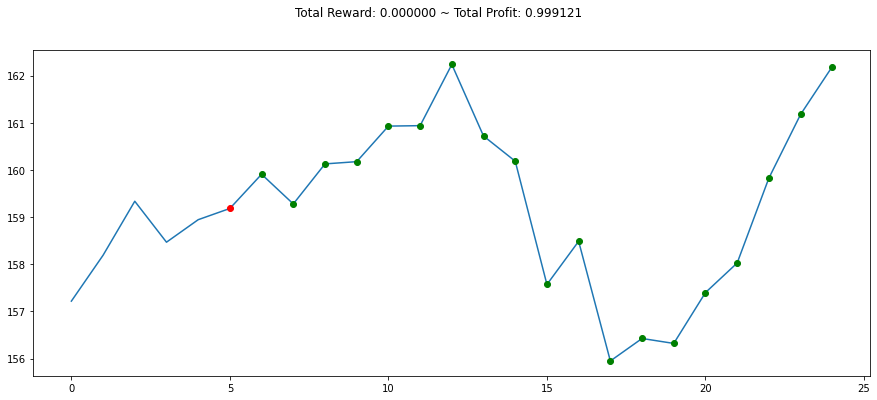

In [24]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()